Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT INTERN/credit risk/loan_data_2007_2014.csv', low_memory=False)

In [ ]:
df.head() # Displays the first 5 rows of the DataFrame


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Membuat Target Variabel

In [ ]:
bad_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']

df['target'] = df['loan_status'].apply(
    lambda x: 1 if x in bad_status else 0
) # binary classifier

Memilih Fitur

In [ ]:
features = [
    'annual_inc', 'emp_length', 'home_ownership',
    'delinq_2yrs', 'acc_now_delinq',
    'dti', 'revol_util',
    'loan_amnt', 'term', 'int_rate', 'installment',
    'purpose', 'grade',
    'inq_last_6mths', 'open_acc', 'total_acc'
]

In [ ]:
X = df[features]
y = df['target']

# Combine X and y, drop rows with any NaN, then split again.
df_combined = pd.concat([X, y], axis=1)
df_cleaned = df_combined.dropna()

X = df_cleaned[features]
y = df_cleaned['target']

Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Memisahkan Tipe Data

In [ ]:
num_features = [
    'annual_inc',
    'dti', 'revol_util', 'loan_amnt',
    'int_rate', 'installment',
    'delinq_2yrs', 'acc_now_delinq',
    'inq_last_6mths', 'open_acc', 'total_acc'
]

In [ ]:
cat_features = [
    'home_ownership', 'purpose', 'grade', 'term', 'emp_length'
]

Preprocessing Pipeline

In [ ]:
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
from sklearn.impute import SimpleImputer

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

Model Pipeline

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

Training Model

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['annual_inc', 'dti',
                                                   'revol_util', 'loan_amnt',
                                                   'int_rate', 'installment',
                                                   'delinq_2yrs',
                                                   'acc_now_delinq',
                                                   'inq_last_6mths', 'open_acc',
                                                   'total_acc']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'purpose',
                                                   'grade', 'term',
                                                   'emp_length'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Prediksi

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Evaluasi

In [ ]:
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     79283
           1       0.17      0.65      0.27      9707

    accuracy                           0.61     88990
   macro avg       0.55      0.63      0.50     88990
weighted avg       0.85      0.61      0.69     88990

AUC: 0.6773001288184636


In [ ]:
coef = model.named_steps['classifier'].coef_[0]

feature_names = (
    model.named_steps['preprocess']
    .transformers_[0][2] +
    list(
        model.named_steps['preprocess']
        .transformers_[1][1]
        .named_steps['onehot']
        .get_feature_names_out(cat_features)
    )
)

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
}).sort_values(by='coefficient', ascending=False)

coef_df.head(10)


,feature,coefficient
4,int_rate,0.656547
28,purpose_small_business,0.562723
32,grade_B,0.347992
31,grade_A,0.295160
5,installment,0.276324
33,grade_C,0.242139
27,purpose_renewable_energy,0.102040
14,home_ownership_OTHER,0.097732
8,inq_last_6mths,0.093317
20,purpose_educational,0.080844


In [ ]:
coef_df.sort_values(by='coefficient')

,feature,coefficient
37,grade_G,-0.531443
36,grade_F,-0.372597
0,annual_inc,-0.254024
18,purpose_credit_card,-0.238081
3,loan_amnt,-0.220158
17,purpose_car,-0.215873
12,home_ownership_MORTGAGE,-0.138433
38,term_ 36 months,-0.131429
35,grade_E,-0.128288
23,purpose_major_purchase,-0.102266


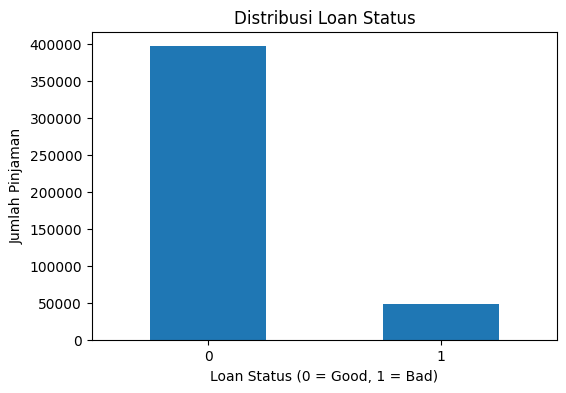

In [ ]:
import matplotlib.pyplot as plt

loan_status_counts = y.value_counts()

plt.figure(figsize=(6,4))
loan_status_counts.plot(kind='bar')
plt.title('Distribusi Loan Status')
plt.xlabel('Loan Status (0 = Good, 1 = Bad)')
plt.ylabel('Jumlah Pinjaman')
plt.xticks(rotation=0)
plt.show()


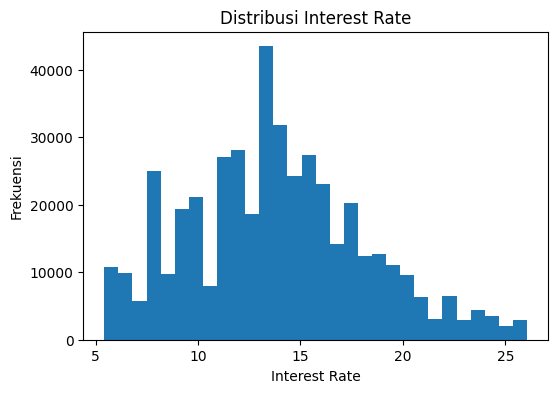

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(X['int_rate'], bins=30)
plt.title('Distribusi Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frekuensi')
plt.show()


/tmp/ipython-input-2176899171.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


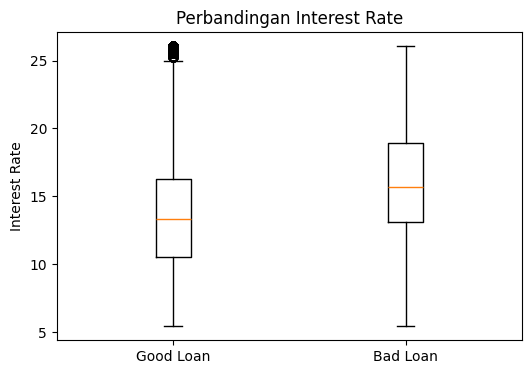

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(
    [X[y==0]['int_rate'], X[y==1]['int_rate']],
    labels=['Good Loan', 'Bad Loan']
)
plt.title('Perbandingan Interest Rate')
plt.ylabel('Interest Rate')
plt.show()


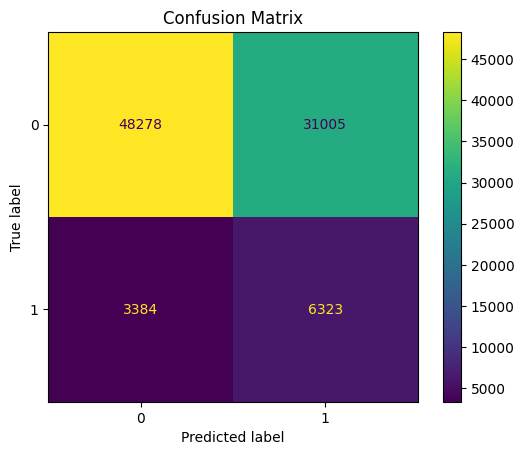

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


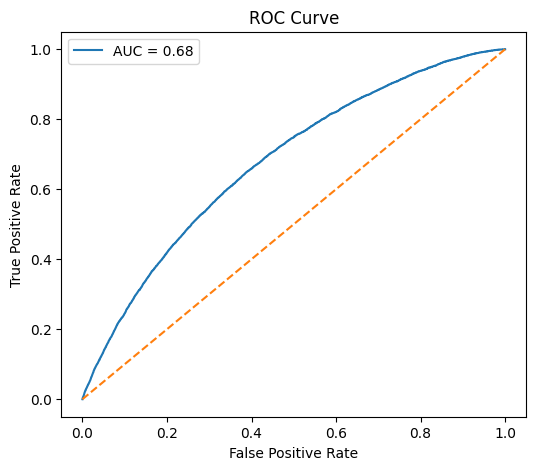

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


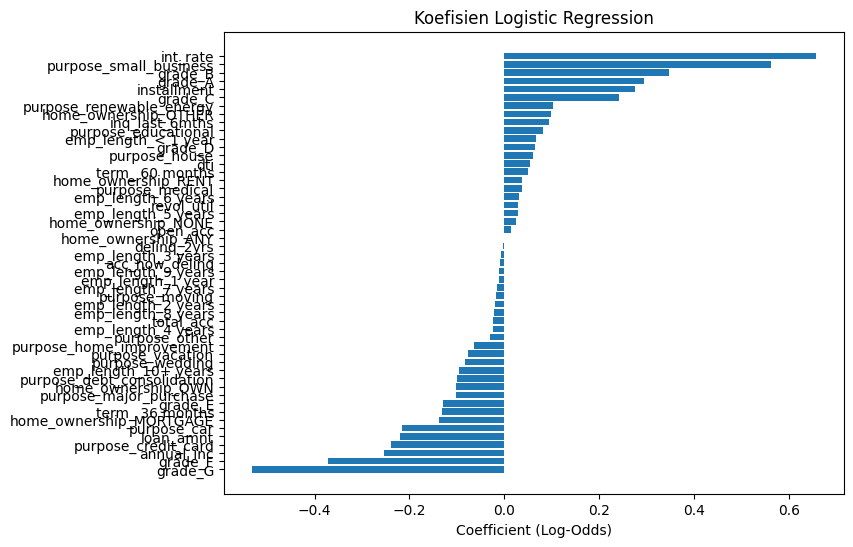

In [ ]:
coef_df_sorted = coef_df.sort_values(by='coefficient')

plt.figure(figsize=(8,6))
plt.barh(coef_df_sorted['feature'], coef_df_sorted['coefficient'])
plt.title('Koefisien Logistic Regression')
plt.xlabel('Coefficient (Log-Odds)')
plt.show()


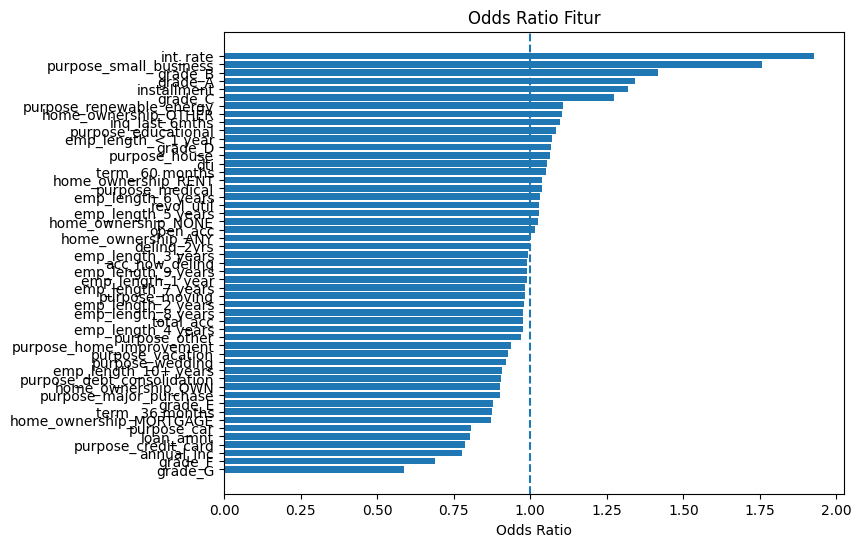

In [ ]:
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
coef_or = coef_df.sort_values(by='odds_ratio')

plt.figure(figsize=(8,6))
plt.barh(coef_or['feature'], coef_or['odds_ratio'])
plt.axvline(1, linestyle='--')
plt.title('Odds Ratio Fitur')
plt.xlabel('Odds Ratio')
plt.show()
